In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


fruits = pd.read_table('readonly/fruit_data_with_colors.txt')

fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [15]:
b = ['a','b','c','d','e','f','g','h','i','j']
b[0::4]

['a', 'e', 'i']

In [8]:
x = np.linspace(-3, 3, 50).reshape(5,-1)
x.shape

(5, 10)

In [2]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [3]:
fruits['fruit_name'].unique()

array(['apple', 'mandarin', 'orange', 'lemon'], dtype=object)

In [12]:
X_fruits = fruits[['mass', 'width', 'height','color_score']]
y_fruits = fruits['fruit_label']
target_names_of_fruits = [['apple', 'mandarin', 'orange', 'lemon']]


X_fruits_2D = fruits[['height','width']]
y_fruits_2D = fruits['fruit_label']

X_train,X_test,y_train,y_test = train_test_split(X_fruits,y_fruits, random_state = 0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)#the fit_transform method is used on the traning data
X_test_scaled = scaler.transform(X_test)#the transform method is used on the test dataset

knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train_scaled,y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled,y_train)))
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_test_scaled,y_test)))


Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on training set: 1.00


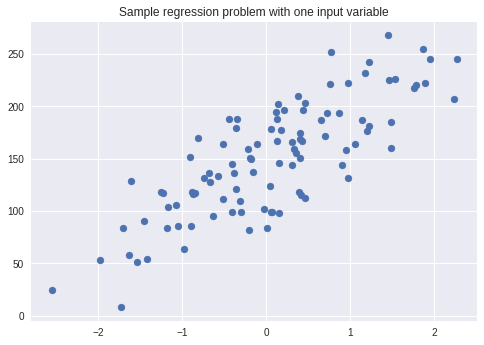

In [3]:
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1,y_R1 = make_regression(n_samples = 100, n_features = 1, n_informative = 1, bias = 150.0, noise = 30, random_state = 0)

plt.scatter(X_R1,y_R1)
plt.show()


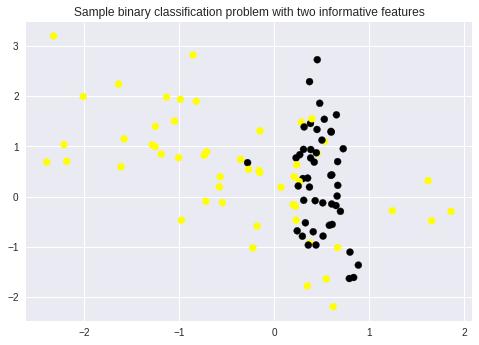

In [4]:
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_c2, y_c2 = make_classification(n_samples = 100, n_features = 2,
                                 n_redundant = 0,n_informative = 2,
                                 n_clusters_per_class = 1, flip_y = 0.1, 
                                 class_sep = 0.5, random_state = 0)

plt.scatter(X_c2[:, 0], X_c2[:, 1], c=y_c2,cmap=cmap_bold)#c = sequence of n numbers to be mapped to colors using cmap and norm.
plt.show()

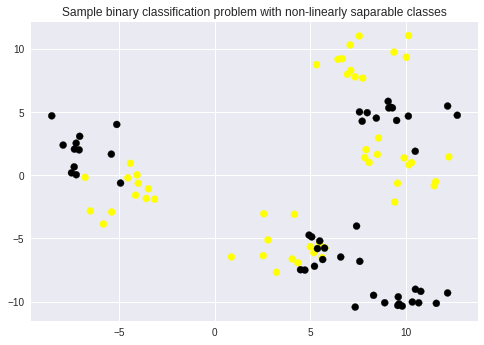

In [5]:
from sklearn.datasets import make_blobs

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

X_d2,y_d2 = make_blobs(n_samples = 100, n_features = 2,
                      centers = 8, cluster_std = 1.3,
                      random_state = 4)

y_d2 = y_d2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly saparable classes')
plt.scatter(X_d2[:,0],X_d2[:,1], c=y_d2, cmap = cmap_bold,)
plt.show()

In [6]:
from adspy_shared_utilities import load_crime_dataset

crime = load_crime_dataset()
type(crime)

tuple

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

scaler = MinMaxScaler()

X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.transform(X_test)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train_S, y_train)

print(knnreg.predict(X_test_S))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test_S, y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score: 0.425


In [40]:
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset 

cancer = load_breast_cancer()
(X_cancer,y_cancer) = load_breast_cancer(return_X_y = True)

(X_crime,y_crime) = load_crime_dataset()

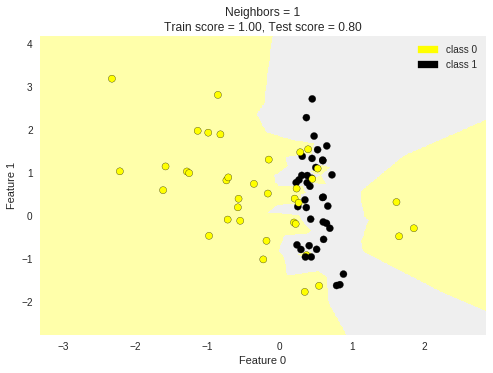

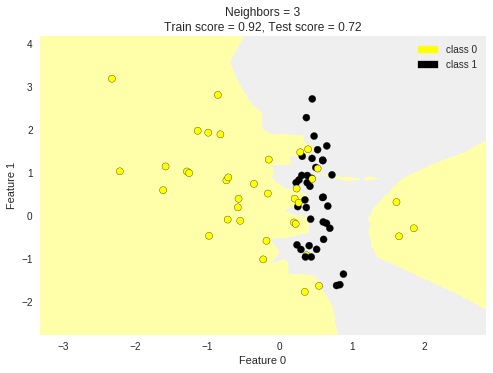

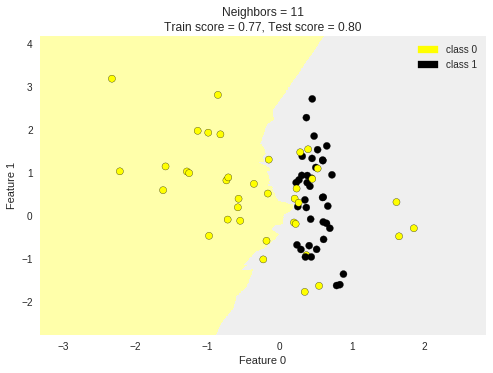

In [18]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_c2,y_c2,random_state = 0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train,y_train)

print(knnreg.predict(X_test))
print('R_squared test score: {:.3f}'.format(knnreg.score(X_test,y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R_squared test score: 0.425


In [27]:
len(X_test)

25

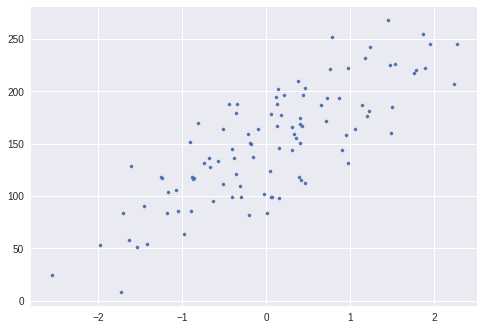

In [57]:
from sklearn.datasets import make_regression

X_R2,Y_R2 = make_regression(n_samples = 100, n_features = 1,
                           n_informative = 1, bias = 150.0,
                           noise = 30, random_state = 0)
plt.scatter(X_R2,Y_R2, marker = 'o',s = 10)#s represent the size of the marker

plt.show()

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_R2, Y_R2, random_state = 0)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train_scaled,y_train)


print(knnreg.predict(X_test_scaled))
print('regression model predictor: {:.5f}'.format(knnreg.score(X_test_scaled,y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
regression model predictor: 0.42468


In [60]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R2, Y_R2, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train,y_train)

print(knnreg.score(X_test,y_test))


0.424680085823


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

linreg = LinearRegression().fit(X_train,y_train)

print('Model Coeficient: {}'.format(linreg.coef_))
print('Momdel intercept: {:.4f}'.format(linreg.intercept_))
print('Regression model training score: {:.4f}'.format(linreg.score(X_train, y_train)))
print('Regression model test score: {:.4f}'.format(linreg.score(X_test, y_test)))

Model Coeficient: [ 45.70870465]
Momdel intercept: 148.4458
Regression model training score: 0.6786
Regression model test score: 0.4916


In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 0)

linridge = Ridge(alpha = 50).fit(X_train,y_train)

print('Crime Dataset')
print('Ridge regression intercept: {}'.format(linridge.intercept_))
print('Ridge regression coefficients: \n{}'.format(linridge.coef_))
print('Ridge regression score (training): {:.3f}'.format(linridge.score(X_train,y_train)))
print('Ridge regression score (test): {:.3f}'.format(linridge.score(X_test,y_test)))
print('Number of non-zero features {}'.format(np.sum(linridge.coef_ != 0)))

Crime Dataset
Ridge regression intercept: -3529.3429444643284
Ridge regression coefficients: 
[  1.95491021e-03   1.19990631e+01   1.00148172e+01  -3.45013903e+01
   5.21857729e+00  -1.93482063e+01  -2.81624296e-03   1.65603954e+00
  -5.57645058e-03  -6.76614678e+00   1.55434492e+01  -5.53463709e+00
   8.85313913e+00   8.60858258e-01  -7.46088873e+00   6.48889903e-03
   2.95303426e-05   4.93749651e-03  -5.07966059e+00  -1.80592470e+01
   9.15539818e+00  -1.32761683e+00   1.10837615e+00   1.01785677e+01
  -3.79106502e+00  -3.68055524e+00   4.53871628e+00   8.16466922e+00
   2.07961553e+01   1.19040844e+01  -1.09289885e+01  -1.90319222e+01
   9.25688469e+00   1.74142412e+00  -2.18464797e+01   2.29481305e+00
   3.02389348e-01   3.97232979e+00  -1.13092686e+01  -4.48255204e-03
   4.30760492e+01  -1.22524159e-03   1.32637029e+00   7.13759856e-01
  -2.68927586e+00   1.00167197e+00  -1.53037428e+01  -1.10989377e+01
   1.37488395e+01  -7.75572046e+00  -3.53454831e-01  -3.53348366e+01
   1.0446

In [ ]:
#the addition of a penalty term to linear model is called regulirasation
#regularisation is a way to improve the likely generalisation of a linear model
#by restricting a models possible parameter settings. its a way to prevent overfitting
#usually the effect of regularisation is to reduce model complexity.

#the amount of regularisation is controlled by the alpha parameter. Larger alpha
#means more regularisation and simpler linera models with weights closer to zero.
#the default setting of alpha is 1.0

In [51]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 5)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha = 10).fit(X_train_scaled,y_train)
linlasso = Lasso(alpha = 2.0, max_iter = 10000).fit(X_train_scaled,y_train)# with some datasets one might get a convergence warning
                                                                            # in such a case the max_iter parameter is increased to 20000
lin = LinearRegression().fit(X_train, y_train)

print('training score for Ridge (Training) : {:.3f}'.format(linridge.score(X_train_scaled, y_train)))
print('training score for Ridge (Test) : {:.3f}\n'.format(linridge.score(X_test_scaled, y_test)))

print('training score for lasso (Training) : {:.3f}'.format(linlasso.score(X_train_scaled, y_train)))
print('training score for lasso (Test) : {:.3f}\n'.format(linlasso.score(X_test_scaled, y_test)))

print('training score for LinearRegression (Training) : {:.3f}'.format(lin.score(X_train, y_train)))
print('training score for LinearRegression (Test) : {:.3f}'.format(lin.score(X_test, y_test)))

training score for Ridge (Training) : 0.626
training score for Ridge (Test) : 0.620

training score for lasso (Training) : 0.625
training score for lasso (Test) : 0.623

training score for LinearRegression (Training) : 0.668
training score for LinearRegression (Test) : 0.637


In [41]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime, random_state = 5)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha = 10).fit(X_train_scaled,y_train)
linlasso = Lasso(alpha = 2.0, max_iter = 10000).fit(X_train_scaled,y_train)# with some datasets one might get a convergence warning
                                                                            # in such a case the max_iter parameter is increased to 20000
lin = LinearRegression().fit(X_train, y_train)

linridge_scores = linridge.decision_function(X_train_scaled)

linridge_scores[:20]

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19.
  warnings.warn(msg, category=DeprecationWarning)


array([ 1268.03236527,   760.59880059,   844.00256217,  1315.08419683,
         582.58854877,    48.340144  ,  1645.22680563,   534.49888444,
         829.41675237,  1493.45226295,   314.33365751,   208.27827397,
         563.12612024,   946.87468087,   754.54329309,   679.89997652,
         946.602591  ,   233.8469872 ,  1514.28171394,   832.54927809])

In [17]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

scaler = MinMaxScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

suvm = SVC(kernel = 'linear', C = 1).fit(X_trained_scaled, y_train)

print('SVM score (training) {:.3f}'.format(suvm.score(X_trained_scaled, y_train)))
print('SVM score (testing) {:.3f}'.format(suvm.score(X_test_scaled, y_test)))

SVM score (training) 0.984
SVM score (testing) 0.965


In [60]:
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

suvm = LinearSVC().fit(X_train, y_train)

print('SVM score (training) {:.3f}'.format(suvm.score(X_train,y_train)))
print('SVM score (test) {:.3f}'.format(suvm.score(X_test,y_test)))

SVM score (training) 0.913
SVM score (test) 0.881


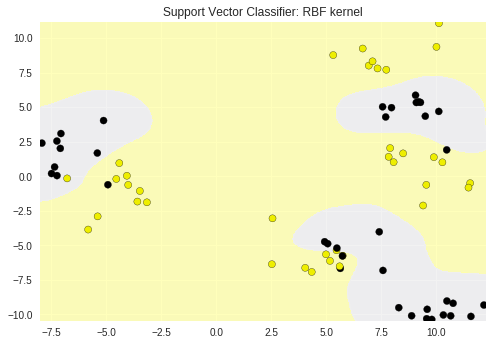

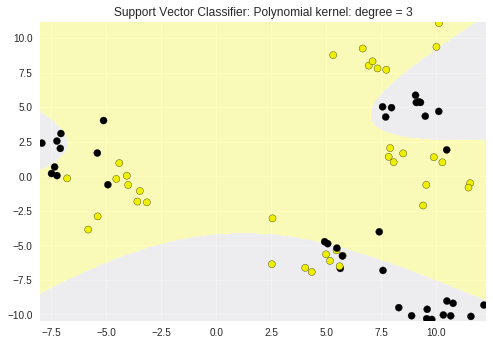

In [8]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_d2, y_d2, random_state=0)

plot_class_regions_for_classifier(SVC().fit(X_train,y_train),X_train, y_train,
                                 None, None, 'Support Vector Classifier: RBF kernel')

plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3).fit(X_train,y_train),X_train, y_train,
                                 None, None, 'Support Vector Classifier: Polynomial kernel: degree = 3')

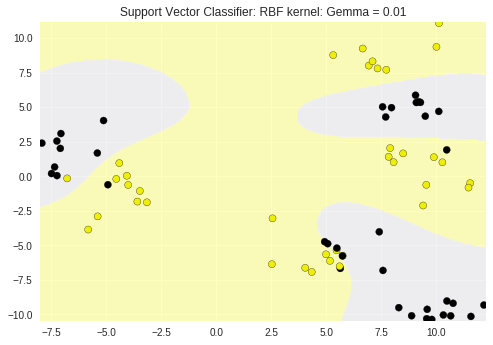

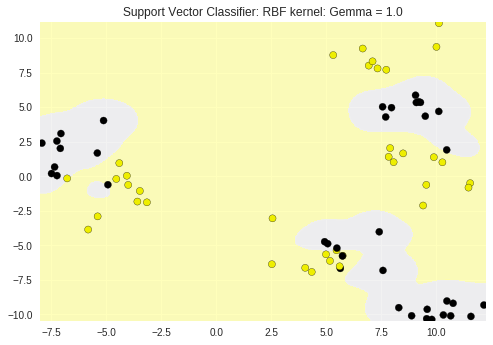

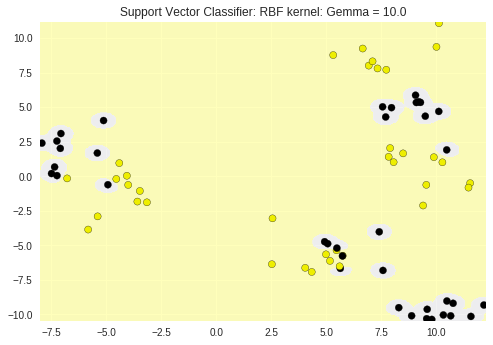

In [11]:
plot_class_regions_for_classifier(SVC(kernel = 'rbf', gamma = 0.1).fit(X_train,y_train),X_train, y_train,
                                 None, None, 'Support Vector Classifier: RBF kernel: Gemma = 0.01')

plot_class_regions_for_classifier(SVC(kernel = 'rbf', gamma = 1.0).fit(X_train,y_train),X_train, y_train,
                                 None, None, 'Support Vector Classifier: RBF kernel: Gemma = 1.0')

plot_class_regions_for_classifier(SVC(kernel = 'rbf', gamma = 10.0).fit(X_train,y_train),X_train, y_train,
                                 None, None, 'Support Vector Classifier: RBF kernel: Gemma = 10.0')

In [16]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors = 5)

X = X_fruits_2D.as_matrix()
Y = y_fruits_2D.as_matrix()

cv_scores = cross_val_score(clf, X, Y)

print('Cross-validation scores (3-fold): ', cv_scores)
print('Mean cross_validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (3-fold):  [ 0.77272727  0.73684211  0.83333333]
Mean cross_validation score (3-fold): 0.781


In [ ]:
# a benefit of computing the accuracy of a model on multiple splits 
#instead of a single split, is that it gives us pontentially useful information about how sensitive
#the model is to the specific training set

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

param_range = np.logspace(-3,3,4)

train_scores, test_scores = validation_curve(SVC(), X,Y, param_name = 'gamma',
                                              param_range = param_range, cv = 3)

In [ ]:
#the validation curve returns two 2-dimensional arrays corresponding to evaluation on the training
#and test set. EACH ARRAY HAS ONE ROW PER PARAMETER VALUE IN THE SWEEP AND THE NUMBER OF COLUMNS
#IS THE NUMBER OF CROSS-VALIDATION FOLS THAT ARE USED.

In [20]:
print(train_scores)

[[ 0.48648649  0.425       0.41463415]
 [ 0.83783784  0.725       0.75609756]
 [ 0.91891892  0.9         0.92682927]
 [ 1.          1.          0.97560976]]


In [21]:
print(test_scores)

[[ 0.45454545  0.31578947  0.33333333]
 [ 0.81818182  0.68421053  0.61111111]
 [ 0.40909091  0.84210526  0.66666667]
 [ 0.36363636  0.21052632  0.38888889]]


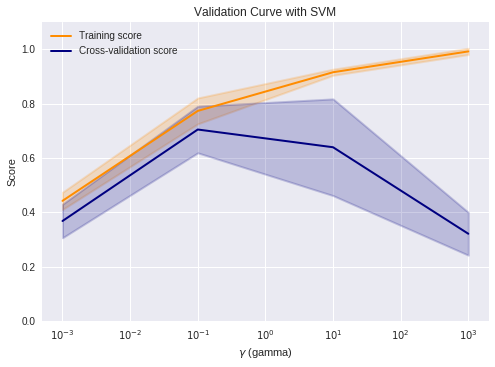

In [24]:
# This code based on scikit-learn validation_plot example
#  See:  http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()

In [ ]:
#the goal of a decision treeis to find the sequence of questions that has the best accuracy at 
#classifying the data in the fewest steps.  

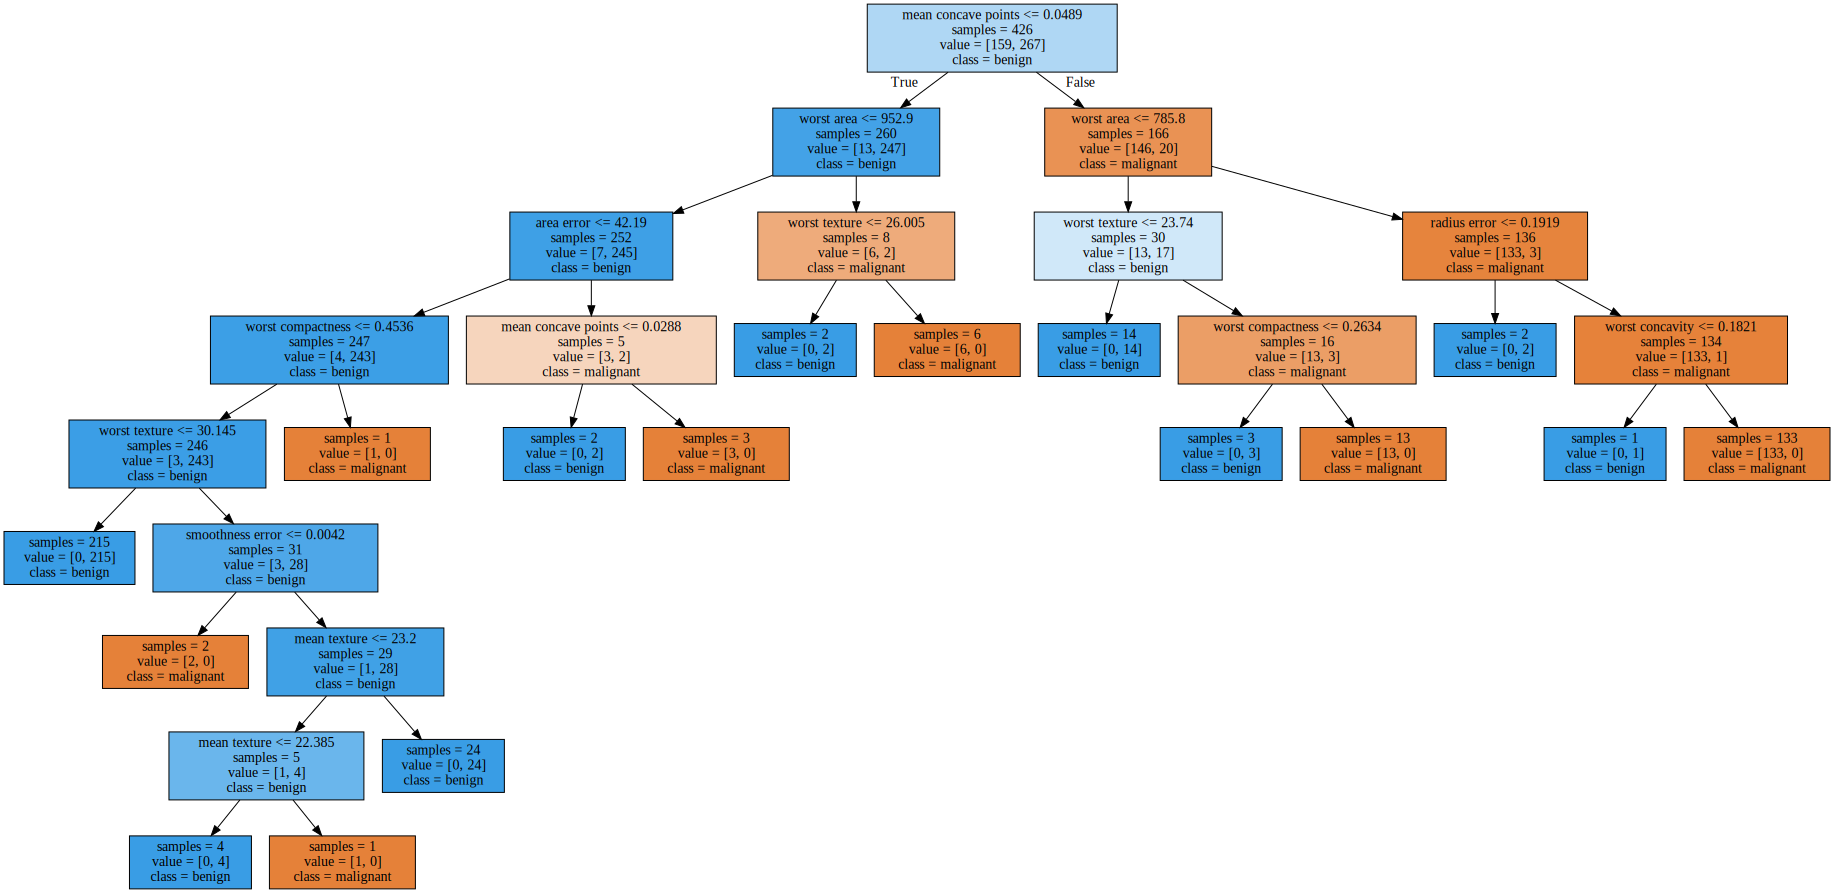

In [31]:
from sklearn.tree import DecisionTreeClassifier
from adspy_shared_utilities import plot_decision_tree
from adspy_shared_utilities import plot_feature_importances

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = DecisionTreeClassifier(random_state = 0).fit(X_train,y_train)

plot_decision_tree(clf, cancer.feature_names, cancer.target_names)

Breast cancer dataset: decision tree
Accuracy of DT classifier on traing set: 1.000
Accuracy of DT classifier on test set: 0.881


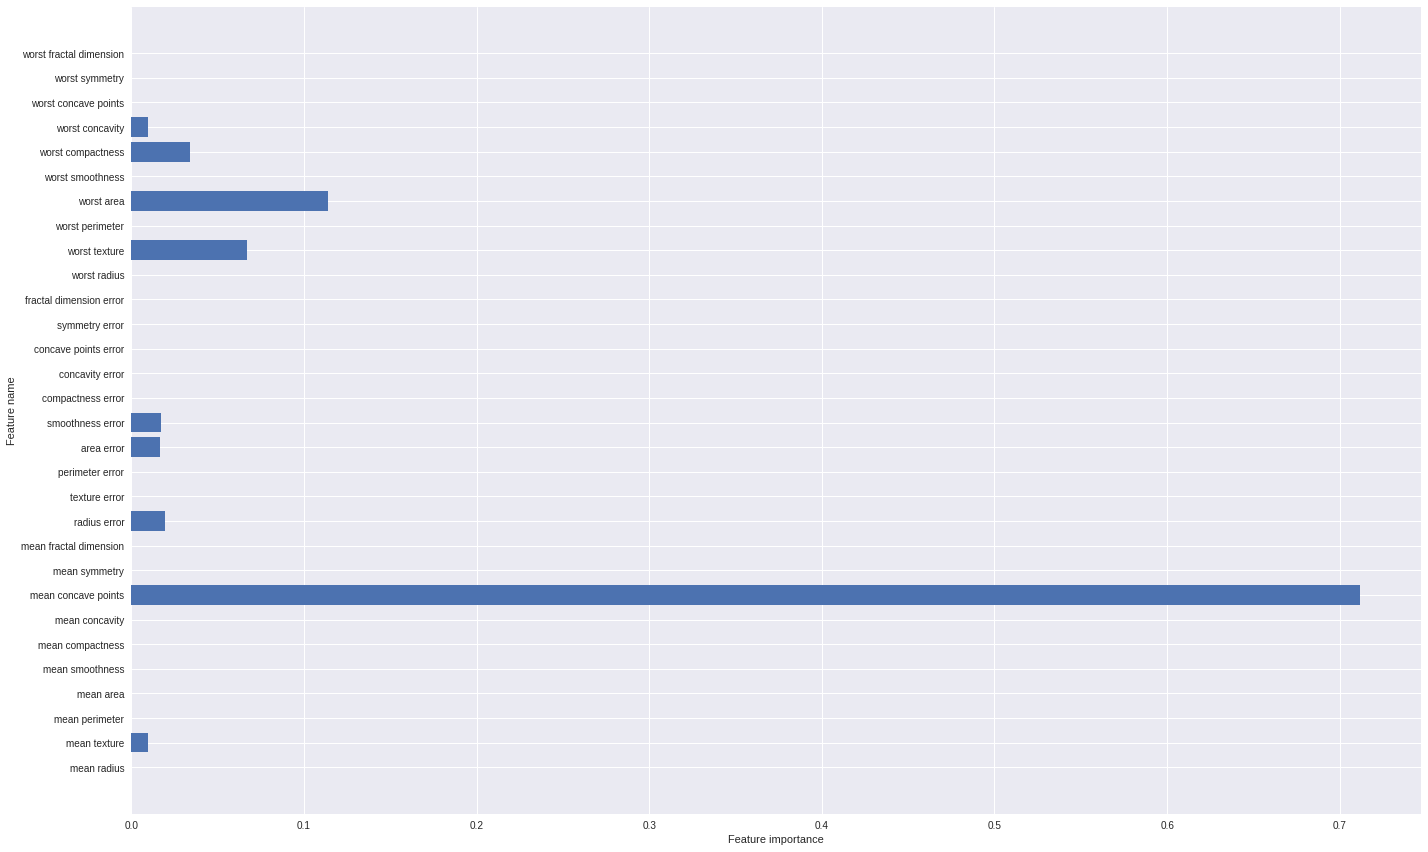

In [32]:
print('Breast cancer dataset: decision tree')
print('Accuracy of DT classifier on traing set: {:.3f}'.
     format(clf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.3f}'.
     format(clf.score(X_test,y_test)))

plt.figure(figsize=(20,12))
plot_feature_importances(clf, cancer.feature_names)
plt.tight_layout()

plt.show()

In [ ]:
#if a feature has a low feature value, that doesn't necessarly mean that the features is not important for prediction

#It simply means that the particular feature wasn't chosen at an early level of the tree and this could be because that the feuature may 
# may be identical or highly correlated with another informative feature and so doesn't provide any new additional signal for prediction

#because feature importancecan vary over multiple train/test splits. for example when performing cross-validation.


In [ ]:
#a des-advantage of decision trees despite the use of pruning they can still overfit all or parts of the data and may not archive the best
#generalisation perfomance compared to other methods.

In [ ]:
#Max_depth controls the maximum depth or the number of the split points the decision can have and its probably the most common
#parameter used to reduce tree complexity and thus reduce overfittinng.

#min_samples_leaf: threshhold for the minimum # of data instances a leaf can have to avoid further splitting.

#max_leaf_nodes: limits the number of leaves in the tree.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X,y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [18]:
tes = pd.Series(data = y)
tes.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [2]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] =  0 #every label that does not equal to 1 is classified as 0 a negative class

print('Original labels:\t', y[1:30])
print('New binary labels:\t', y_binary_imbalanced[1:30])


Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)

array([1615,  182])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

from sklearn.svm import SVC

svm =SVC(kernel = 'rbf', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.90888888888888886

In [4]:
# DummyClassifier is a classifier that makes predictions using simple rules, which can 
# be useful as a baseline for comparison against actual classifiers, 
# especially with imbalanced classes.

from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)
y_dummy_predictions = dummy_majority.predict(X_test)


In [ ]:
#dummy classifiers provide what is called a null accuracy baseline by always picking the most frequent class
#It provides a useful sanity checkin point of correction

In [ ]:
# If a classifier is close to the null accuracy basleine

# this could be a sign of:
#     ineffective, errorneous or missing values
#     poor choice of kernel of hyperparameter
#     large class imbalance

In [ ]:
# in general, for imbalanced classification problems. one should use metrices other than accuray


In [ ]:
# Dummy Regressors are the same as classifiers. 

# Strategy parameter options:
#     mean: predicts the mean of the training targets.
#     meadian: predicts the median of the training targets
#     quantile: predicts a user-provided quantile of the training targets.
#     constant: predicts a constant user-provided value.
        


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Random class-proportional prediction (dummy classifier)\n', confusion)
print(precision_score(y_test,y_majority_predicted))

Random class-proportional prediction (dummy classifier)
 [[407   0]
 [ 43   0]]
0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [6]:
from sklearn.metrics import precision_score
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)
print('\n',precision_score(y_test, svm_predicted))

Support vector machine classifier (linear kernel, C=1)
 [[402   5]
 [  5  38]]

 0.883720930233


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train,y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test,tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', confusion)
print(recall_score(y_test, tree_predicted))

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]
0.604651162791


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,tree_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test,tree_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test,tree_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test,tree_predicted)))

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test,tree_predicted))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97       407
          1       0.79      0.60      0.68        43

avg / total       0.94      0.95      0.94       450



In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state =0)

y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

score_list = list(zip(y_test,y_scores_lr))


score_list

[(0, -23.172292973469546),
 (0, -13.542576515500063),
 (0, -21.717588760007867),
 (0, -18.903065133316439),
 (0, -19.733169947138638),
 (0, -9.7463217496747667),
 (1, 5.2327155658831135),
 (0, -19.308012306288916),
 (0, -25.099330209728528),
 (0, -21.824312362996),
 (0, -24.14378275072049),
 (0, -19.578811099762508),
 (0, -22.568371393280199),
 (0, -10.822590225240777),
 (0, -11.907918741521932),
 (0, -10.977026853802803),
 (1, 11.206811164226373),
 (0, -27.64415761980748),
 (0, -12.857692102545409),
 (0, -25.848149140240199),
 (0, -21.65049098788878),
 (0, -12.20315016323068),
 (0, -23.856018598052163),
 (0, -9.3248004830884614),
 (0, -30.922656170113651),
 (0, -17.306150368889043),
 (0, -16.893304058857371),
 (0, -36.632751987786349),
 (0, -31.39159940578562),
 (0, -27.342623269857295),
 (0, -16.709616404334746),
 (0, -26.491701816577809),
 (0, -12.56255270369661),
 (0, -6.0197557750932535),
 (0, -12.946164143308453),
 (0, -20.339839280410743),
 (0, -22.169278465098337),
 (1, -1.8713

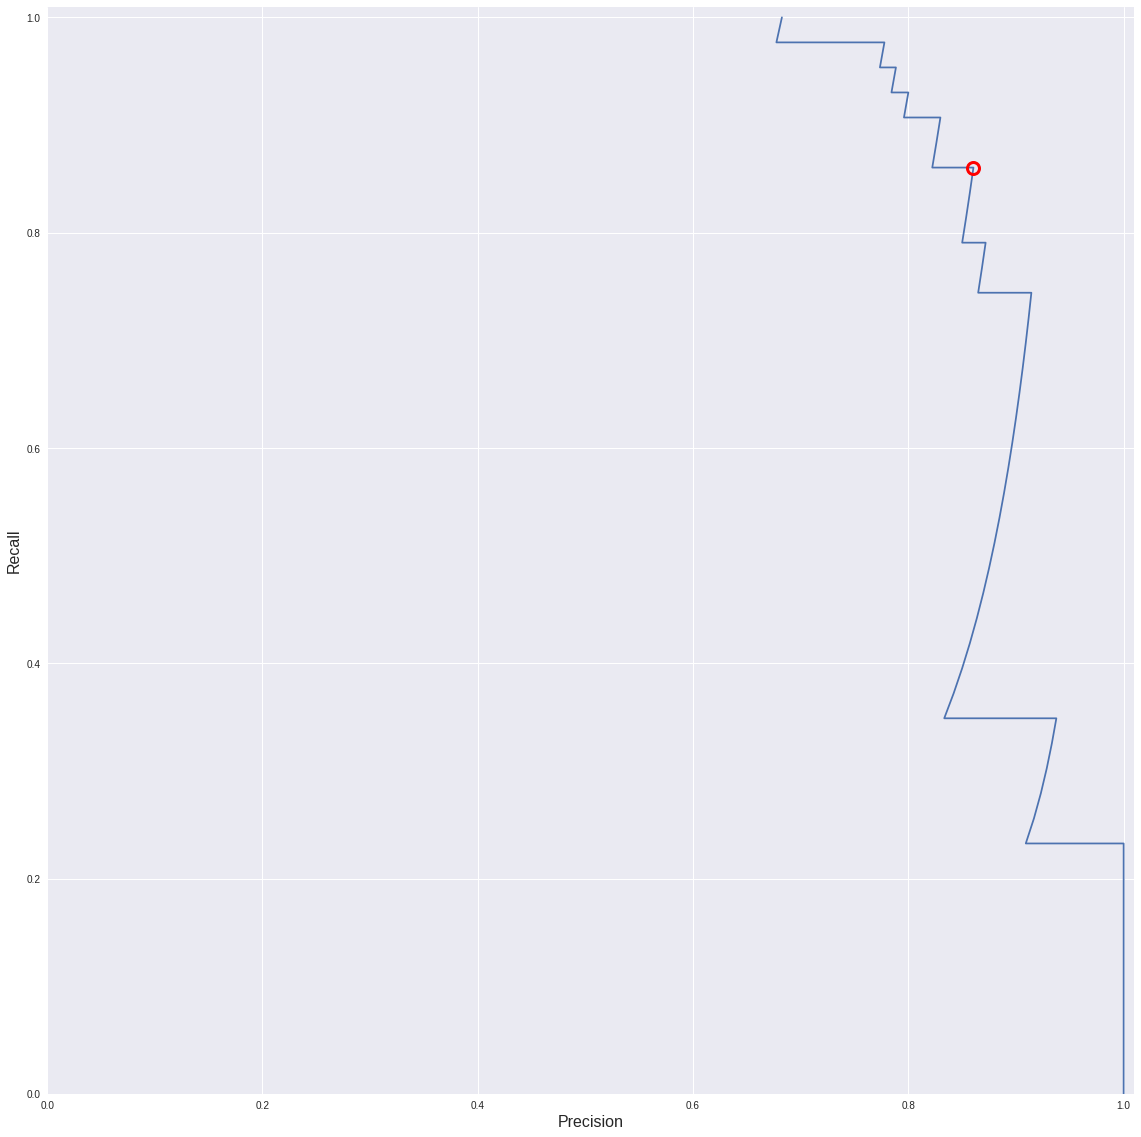

In [27]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))#argmin Returns the indices of the minimum values along an axis
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize =(20,20))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

In [28]:
thresholds

array([ -4.04847662,  -3.93819545,  -3.48628627,  -3.44776445,
        -3.33892603,  -2.5783356 ,  -2.37746137,  -2.34718536,
        -2.30446832,  -2.15792885,  -2.03386685,  -1.87131487,
        -1.7495844 ,  -1.72691524,  -1.68712543,  -1.47668716,
        -1.33979401,  -1.3051061 ,  -1.08033549,  -0.57099832,
         0.13088342,   0.17583273,   0.47631823,   0.6418365 ,
         1.00422797,   1.33670725,   1.68203683,   1.69861005,
         1.87908244,   2.18989765,   2.43420944,   2.55168221,
         3.71752409,   3.80620565,   4.21070117,   4.25093438,
         4.30966876,   4.31558393,   4.55321241,   4.57143325,
         4.93002949,   5.23271557,   5.73378353,   6.12856799,
         6.55341039,   6.86404167,   6.92400179,   7.22184672,
         7.37403798,   7.80959453,   8.26212674,   8.3930213 ,
         8.45858117,   9.84572083,   9.87342932,  10.201736  ,
        11.20681116,  11.4821926 ,  11.55476419,  11.68009017,
        13.26095216,  14.73832302,  16.02811865])

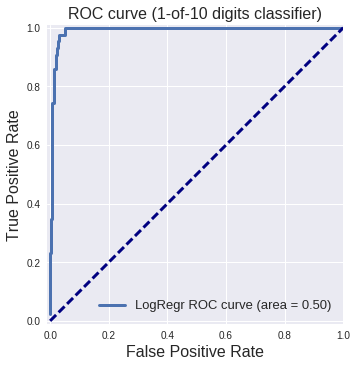

In [18]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

y_score_lr = lr.fit(X_train,y_train).decision_function(X_test)
fpr_lr,tpr_lr, _ = roc_curve(y_test,y_score_lr)
roc_auc_lr = auc(fpr_lr,fpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [10]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [36]:
data.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

In [25]:
tes = pd.Series(data.target)
tes.value_counts()

1    357
0    212
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state = 0)

clf = SVC(kernel = 'rbf', C = 1).fit(X_train,y_train)
clf_scores = clf.decision_function(X_train)
clf_predicted = clf.predict(X_test)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_clf = SVC(kernel = 'rbf', C = 1).fit(X_train_scaled,y_train)
svm_clf_scores = svm_clf.decision_function(X_test_scaled)
svm_clf_predicted = svm_clf.predict(X_test_scaled) 

print(confusion_matrix(y_test, svm_clf_predicted))
print('\n',confusion_matrix(y_test, clf_predicted))
print('\nScaled SVM score: {:.4f}'.format(clf.score(X_test,y_test)))
print('\nScaled SVM_scaled score: {:.4f}'.format(svm_clf.score(X_test,y_test)))

[[46  7]
 [ 0 90]]

 [[ 0 53]
 [ 0 90]]

Scaled SVM score: 0.6294

Scaled SVM_scaled score: 0.6294


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,svm_clf_predicted))#the recall is 1 because the false negatives are equal to 0b

             precision    recall  f1-score   support

          0       1.00      0.87      0.93        53
          1       0.93      1.00      0.96        90

avg / total       0.95      0.95      0.95       143



In [19]:
from sklearn.metrics import roc_curve, auc

fpr_svm_,trp_svm_, _ = roc_curve(y_test,svm_clf_predicted)

print('false positive rate is {:.5f} and the true positive rate is {:.5f}'.format(fpr_svm_[1],trp_svm_[1]))

false positive rate is 0.13208 and the true positive rate is 1.00000


In [20]:
auc(fpr_svm_,trp_svm_)

0.93396226415094341

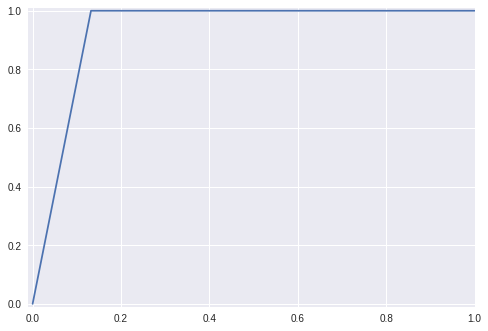

In [23]:
import matplotlib.pyplot as plt

plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_svm_,trp_svm_)

plt.show()

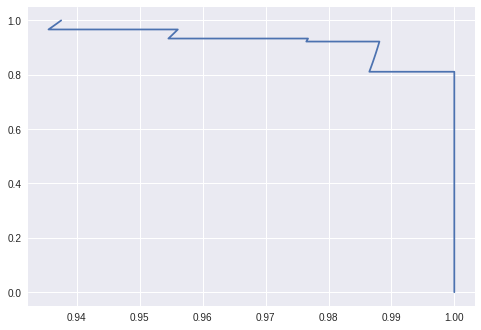

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svm_clf_scores)

plt.plot(precision, recall)

plt.show()

<IPython.core.display.Javascript object>


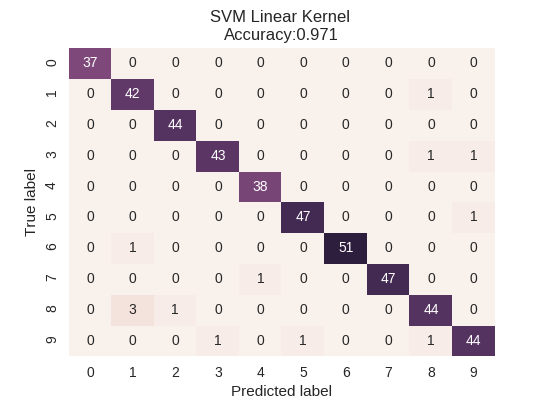

<IPython.core.display.Javascript object>


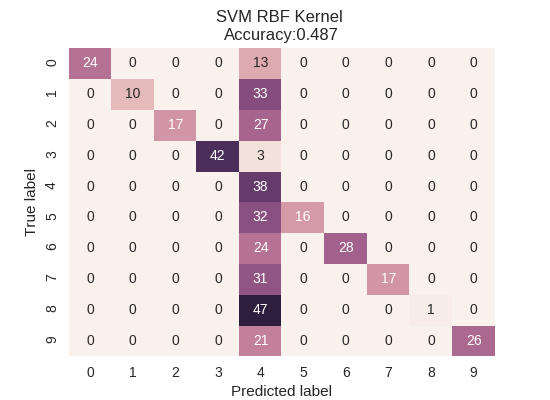

In [35]:
from sklearn.metrics import accuracy_score

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)#create a confusion matrix for the multiclass svm 
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

%matplotlib notebook
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True,cbar = None)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True, cbar = None)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [36]:
precision_score(y_test_mc,svm_predicted_mc, average = 'micro')

0.48666666666666669

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X, y = dataset.data, dataset.target == 1
clf = SVC(kernel = 'linear', C = 1)

print('Cross-validation (AUC)',cross_val_score(clf,X,y,cv = 5, scoring = 'roc_auc'))
print('Cross-validation (Recall)',cross_val_score(clf,X,y,cv = 5, scoring = 'recall'))


Cross-validation (AUC) [ 0.9641871   0.9976571   0.99372205  0.99699002  0.98675611]
Cross-validation (Recall) [ 0.81081081  0.89189189  0.83333333  0.83333333  0.83333333]


In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(kernel = 'linear', C = 1)
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

#default metric to optimize over grid parameters: accuracy
grid_clf_accuracy = GridSearchCV(clf,param_grid = grid_values)
grid_clf_accuracy.fit(X_train,y_train)
y_decision_fn_scores_accuracy = grid_clf_accuracy.decision_function(X_test)

print('Grid best parameter (max. accuracy): ', grid_clf_accuracy.best_params_)
print('Grid best score (accuracy)', grid_clf_accuracy.best_score_)

# alternative metric to optimize over grid parameters: AUC
grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Grid best parameter (max. accuracy):  {'gamma': 0.001}
Grid best score (accuracy) 0.972531551596
Test set AUC:  0.992857550997
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.993673024871


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits
import numpy as np


data = load_digits()

X,y = data.data ,data.target == 1

clf = SVC(kernel = 'poly', C = 1)

accuracy = cross_val_score(clf,X,y, cv = 10)
mean_accuracy = np.mean(accuracy)
std_accuracy = np.std(accuracy)

print(accuracy)
print(mean_accuracy)
print(std_accuracy)

AUc_shandies = cross_val_score(clf,X,y, cv = 10, scoring = 'roc_auc')
mean_auc = np.mean(AUc_shandies)
std_auc = np.std(AUc_shandies)

print(AUc_shandies)
print(mean_auc)
print(std_auc)

# print('Cross-validation (accuracy)', cross_val_score(clf,X,y, cv = 10))
# print('Cross-validation (AUC)', cross_val_score(clf,X,y, cv = 10, scoring = 'roc_auc'))
# print('Cross-validation (recall)', cross_val_score(clf,X,y, cv = 10, scoring = 'recall'))

[ 0.96132597  0.98895028  1.          0.99444444  1.          1.
  0.99441341  0.98882682  0.98882682  0.97765363]
0.989444135793
0.0114657273881
[ 0.99512671  0.99902534  1.          0.99897119  1.          1.          1.
  0.99930987  0.99758454  0.9989648 ]
0.998898245345
0.00144917640478


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X,y = dataset.data , dataset.target == 1

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

clf = SVC(kernel = 'rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100], 'C': [1,2,3,4,5,6,7]}

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)


Test set AUC:  0.999942860408
Grid best parameter (max. AUC):  {'C': 2, 'gamma': 0.001}
Grid best score (AUC):  0.999964037832


In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X,y = dataset.data , dataset.target == 1

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

clf = SVC(kernel = 'rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test) 

print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
print('Grid best score (AUC): ', grid_clf_auc.best_score_)

Test set AUC:  0.999828581224
Grid best parameter (max. AUC):  {'gamma': 0.001}
Grid best score (AUC):  0.99987412783


In [14]:
from sklearn.metrics.scorer import SCORERS

print(sorted(list(SCORERS.keys())))

['accuracy', 'adjusted_rand_score', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'log_loss', 'mean_absolute_error', 'mean_squared_error', 'median_absolute_error', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc']
